<a href="https://colab.research.google.com/github/Vijay14501/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><u> Project Title : Online Retail Customer Segmentation </u></b>

Project Type - Unisupervised ML

Contribution - Individual

Team Member 1- Vijay N

**Project Summary**

**Data Preprocessing :**

1.Getting the dataset

2.Importing libraries

3.Importing datasets

4.Finding Missing Data

5.Encoding Categorical Data

6.Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

Checked top countries with most cancelled Orders.

Checked which country has the lowest number of orders.

Checked Who made the highest expenditure on their purchase.

Checked Which Customer displays a significant degree of shopping engagement.

Checked On which day is shopping most frequent or busies.

Checked during which month is shopping at its peak.

Checked which are the top selling products.

Checked what are the peak hours for purchases.

Checked during which month is shopping at its peak.


**we applied few of the unisupervised machine learning algorithms** -

1.Hierarchical Clustering

2.Kmeans Clustering


 **GitHub Link** -https://github.com/Vijay14501/Online-Retail-Customer-Segmentation.git

 <b> Problem Description </b>

 In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

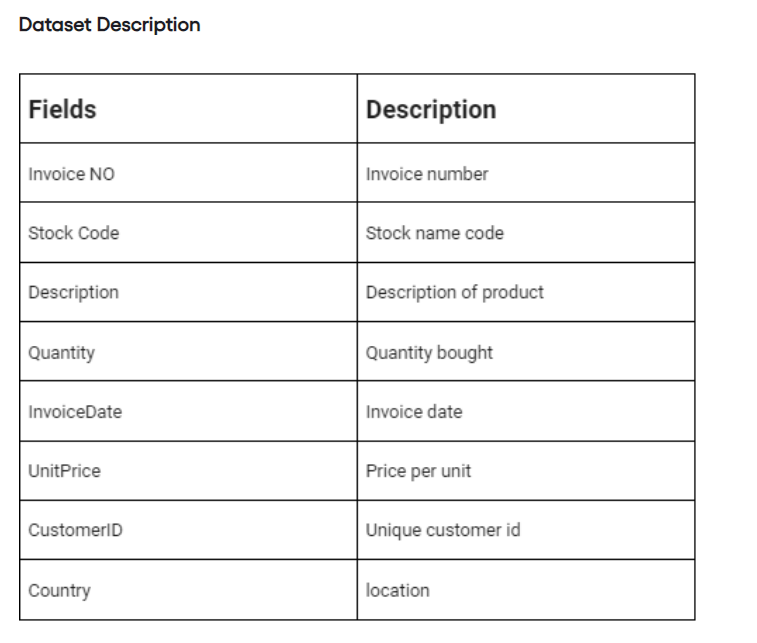

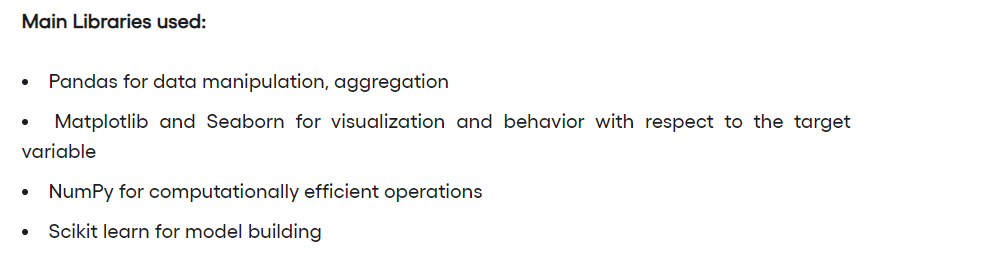

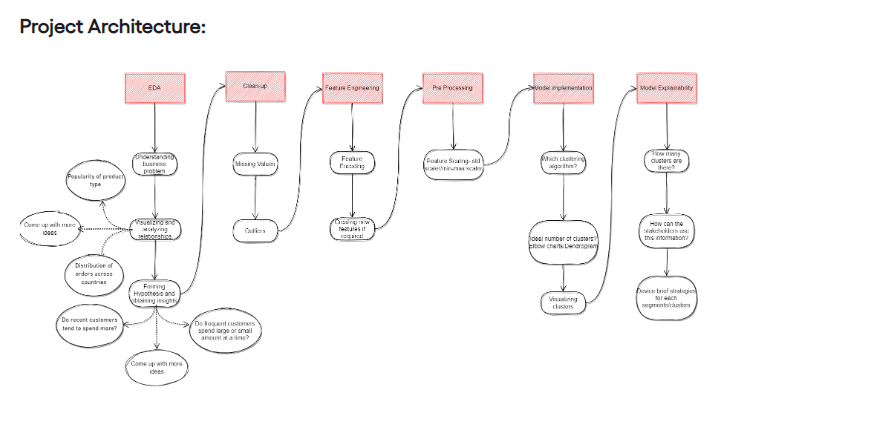

**Importing the necessary libraries and reading the file**

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import scipy.stats as stat
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Dataset
dataset = pd.read_excel("/content/drive/MyDrive/data set zomoto/Online Retail.xlsx")

creating a copy of dataset

In [4]:
df = dataset.copy()

**Defining necessary functions**

In [5]:
def check_duplicates(dataset):
  '''This function will print if there are duplicates in the dataset'''

  if(len(dataset[dataset.duplicated()])>0):
    print("There are duplicates in the data. The number of Duplicates are ",len(dataset[dataset.duplicated()]))
  else:
    print("There are no duplicates")

In [6]:
def visualize_missing_percent(dataset):
  '''This function takes the dataframe as input as the input and gives the count of missing values,
  missing values in percentage per column and plots the same in a bargraph'''

  #total percentage of missing data
  if dataset.isnull().sum().sum()>0:
    print("Missing values found..Calculating the total...")
    missing_data = dataset.isnull().sum()
    total_percentage = (missing_data.sum()/dataset.shape[0]) * 100
    print(f'The total number of missing entries found is {dataset.isnull().sum().sum()}, that is {round(total_percentage,2)}%')
    print('')

    # percentage of missing data per category
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent_total = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)*100
    missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
    missing_data = missing[missing['Total']>0]
    print(missing_data)
    print('')

    #Visualize the missing value percentage
    plt.figure(figsize=(9,6))
    sns.set(style="whitegrid")
    sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
    plt.title('Percentage of missing data by feature', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.show()
  else:
    print('Hurray! There are no missing values in the data.')


In [7]:
def bargraph(df,X,Y,title):
  '''This function takes the columns of the dataframe as input
  and gives barplot as output'''

  # Figure Size
  sns.set(rc={'figure.figsize':(19,7)})

  # creating the bar plot
  sns.barplot(x=X, y=Y, data=df,order=df[X],palette='flare_r')

  # set title
  plt.title(title, size=20)

  ## Showing the plot
  plt.show()


In [8]:
def time_type(time):
  '''This function takes the time as input and
  gives time_type like morning,afternoon or evening has output'''
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16):
    return 'Afternoon'
  else:
    return 'Evening'

In [9]:
def check_skew(df, column):
    '''This function is used to check and plot the skewness'''
    skew = stat.skew(df[column])
    skewtest = stat.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [10]:
def handle_neg_n_zero(num):
    '''This function is used to handle negative and zero values
    so as to handle infinite numbers during log transformation'''
    if num <= 0:
        return 1
    else:
        return num

In [11]:
#Functions used in RFM model
def RScoring(x,p,d):
    '''Function to create Recency segment'''
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    '''Function to create Frequency and Monetary segment'''
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

**Data Exploration**

In [12]:
print("The shape of the dataset is ",df.shape)

The shape of the dataset is  (541909, 8)


In [13]:
#Storing the rows of dataset
original_rows = df.shape[0]
original_rows

541909

In [14]:
#Familiarize with the dataset columns
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [16]:
#Checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
print("Lets take a look at the statistics of the columns")
df.describe(include='all')

Lets take a look at the statistics of the columns


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


**Regarding Data Reversal**:

The dataset shows that both the highest and lowest values for 'Quantity' are 80995. This suggests the possibility of a data reversal issue, where the initial and reversed entries are both present. Further investigation is required to fully understand this data anomaly and determine the appropriate approach for handling such reversals.

**Regarding Negative Unit Price and Cancellation Orders:**

Negative 'UnitPrice' values are atypical since they imply a financial outflow for the company. These transactions may indicate canceled orders by customers or instances of bad debt incurred by the business. A deeper analysis is warranted to identify and properly categorize such transactions as potential cancellation orders or bad-debt occurrences.

**Checking for Duplicate**

Eliminating duplicate records from your data is essential because it signifies the presence of redundant information. These duplicates may arise from a variety of sources, including data input mistakes or the way data is gathered. By eradicating such redundancies, you can achieve significant time and cost savings, especially in scenarios where communications or actions are based on the data. Removing duplicates ensures that the same information is not relayed multiple times to the same individuals, thereby optimizing efficiency and resource allocation.

In [18]:
#Checking for duplicates
check_duplicates(df)

There are duplicates in the data. The number of Duplicates are  5268


Lets drop duplicates in the data.

In [19]:
df.drop_duplicates(keep = False, inplace = True)

In [20]:
df.shape

(531762, 8)

In [21]:
#Checking for duplicates
check_duplicates(df)

There are no duplicates


**Checking for Null/Missing Values**

Dealing with missing values is a crucial step in data preprocessing. In practical datasets, missing values are a common occurrence and can arise due to various reasons, such as data corruption, incomplete records, or human error in data collection. It is imperative to address missing data because numerous machine learning algorithms are not equipped to handle datasets containing gaps or null values. Therefore, it's essential to prioritize the identification and handling of missing values as one of the initial steps in data analysis and preprocessing.

In [22]:
#Familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531762 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531762 non-null  object        
 1   StockCode    531762 non-null  object        
 2   Description  530308 non-null  object        
 3   Quantity     531762 non-null  int64         
 4   InvoiceDate  531762 non-null  datetime64[ns]
 5   UnitPrice    531762 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      531762 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


Missing values found..Calculating the total...
The total number of missing entries found is 136449, that is 25.66%

              Total  Percentage
CustomerID   134995   25.386357
Description    1454    0.273431



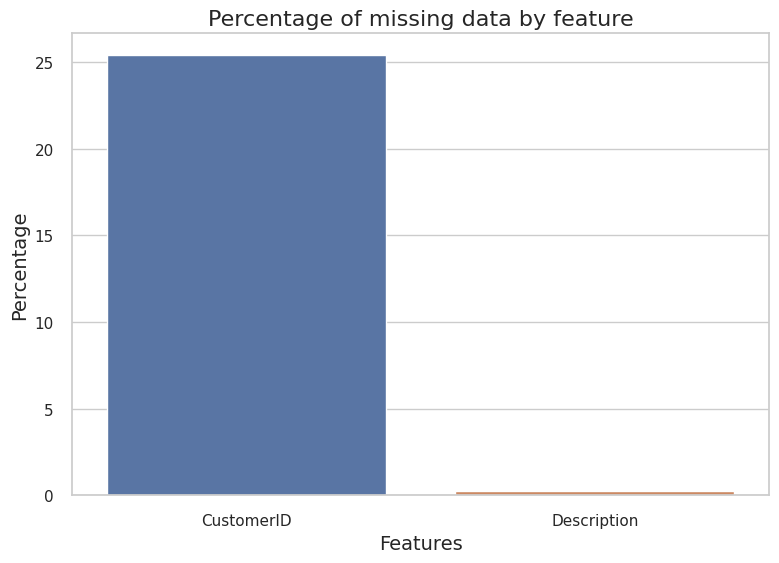

In [23]:
visualize_missing_percent(df)

Approximately 25% of the dataset lacks CustomerID values, which serve as unique identifiers for each customer. This absence of unique customer identifiers could potentially pose challenges for tasks such as market and customer segmentation, which rely on grouping customers based on these identifiers. Therefore, addressing these missing values is essential.

One way to handle missing CustomerID data is by imputing it with a random number that does not exist in the dataset. This approach considers that in online purchases, transactions can often occur under the 'Guest Checkout' option, which doesn't require customers to create an account.

While it's possible to impute CustomerID based on the unique value of InvoiceNo, this method may introduce significant inaccuracies when matching canceled transactions. This is because, as observed, the corresponding purchase and canceled transaction do not necessarily share the same InvoiceNo.

It's important to note that such transactions are more likely to be one-time purchases, as frequent shoppers are more likely to create accounts for the convenience of repeat purchases. Therefore, an alternative approach would be to drop the missing values.

In [24]:
df.dropna(inplace=True)

In [25]:
visualize_missing_percent(df)

Hurray! There are no missing values in the data.


In [26]:
#Storing number of rows
new_rows = df.shape[0]

In [27]:
print(round((new_rows/original_rows)*100,2),"% of data is retained after cleaning and analysis")

73.22 % of data is retained after cleaning and analysis


**Exploratory Data Analysis**

EDA is a fundamental part of data analysis that helps in ensuring data quality, understanding the data, and generating insights. It serves as the basis for making informed decisions throughout the data analysis process.

**Data Preprocessing**

Create a new column **TotalAmount** by combining UnitPrice and Quantity.

In [28]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Convert **InvoiceDate** to datatime format. And split them into hour, min, day, month, year columns

In [29]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396767 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396767 non-null  object        
 1   StockCode    396767 non-null  object        
 2   Description  396767 non-null  object        
 3   Quantity     396767 non-null  int64         
 4   InvoiceDate  396767 non-null  datetime64[ns]
 5   UnitPrice    396767 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      396767 non-null  object        
 8   TotalAmount  396767 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.3+ MB


In [31]:
df['month']=df['InvoiceDate'].dt.month_name()
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].dt.year
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

Since we are having 1 year of data. Let's drop year column.
<br>
And 'hour' column will be sufficient for our analysis so, we will be utilizing hour column and dropping of minute column.

In [32]:
df.drop(columns=['year','minute'],axis=1,inplace=True)

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8


**Analysis of Columns**

In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'month', 'day',
       'hour'],
      dtype='object')

**Invoice Number**

Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Now let us now look at the number of canceled orders in the data.

In [35]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10


In [36]:
print("Shape of cancelled order", cancel_order.shape)

Shape of cancelled order (8844, 12)


In [37]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
print("We have about ",round(cancel_order_percentage,2),"% of cancelled orders.")

We have about  2.23 % of cancelled orders.


**Top 10 countries with most cancelled Orders**

In [38]:
## Apply groupby function on country and Invoice No.
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [39]:
## From cancel_order_country variable finding top 10 countries with cancelled order
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10 = cancel_order_country_top10.rename({'InvoiceNo':'Num of order cancelled'},axis=1)
cancel_order_country_top10

,Country,Num of order cancelled
0,United Kingdom,7474
1,Germany,453
2,EIRE,247
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


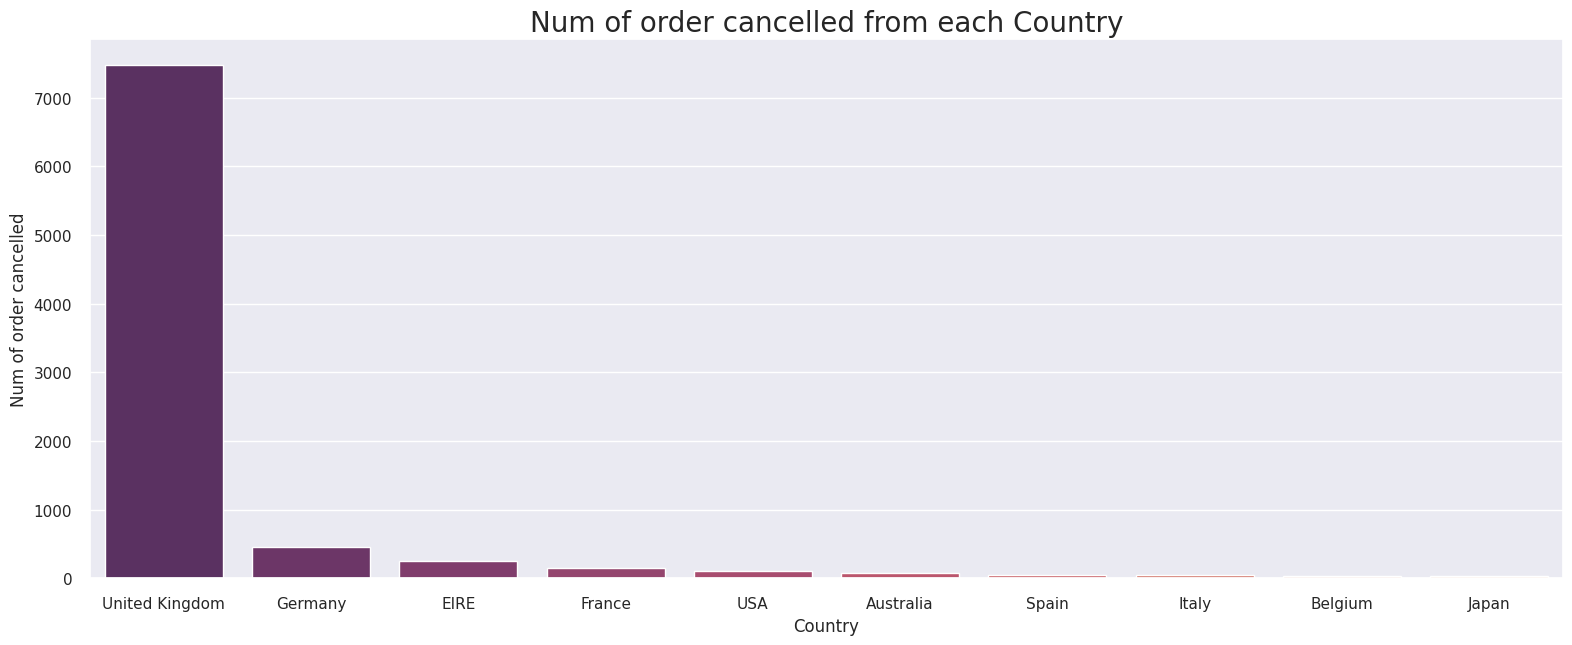

In [40]:
bargraph(cancel_order_country_top10,'Country','Num of order cancelled','Num of order cancelled from each Country')

Based on the data presented in the graph, it's apparent that there is a higher number of cancelled orders in the UK. To proceed, we should exclude the canceled order data from the dataset.

In [41]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

**Which country has the lowest number of orders**

In [42]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [43]:
country_count.head()

,Country,InvoiceNo
0,Australia,1183
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


In [44]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)

In [45]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= round(Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count(),2)
Top_ten_country = Top_ten_country.rename({'Country_percent':'Percentage of Order'},axis=1)
Top_ten_country

,Country,InvoiceNo,Percentage of Order
0,United Kingdom,344490,88.80
1,Germany,9012,2.32
2,France,8312,2.14
3,EIRE,7218,1.86
4,Spain,2475,0.64
5,Netherlands,2363,0.61
6,Belgium,2031,0.52
7,Switzerland,1842,0.47
8,Portugal,1445,0.37
9,Australia,1183,0.30


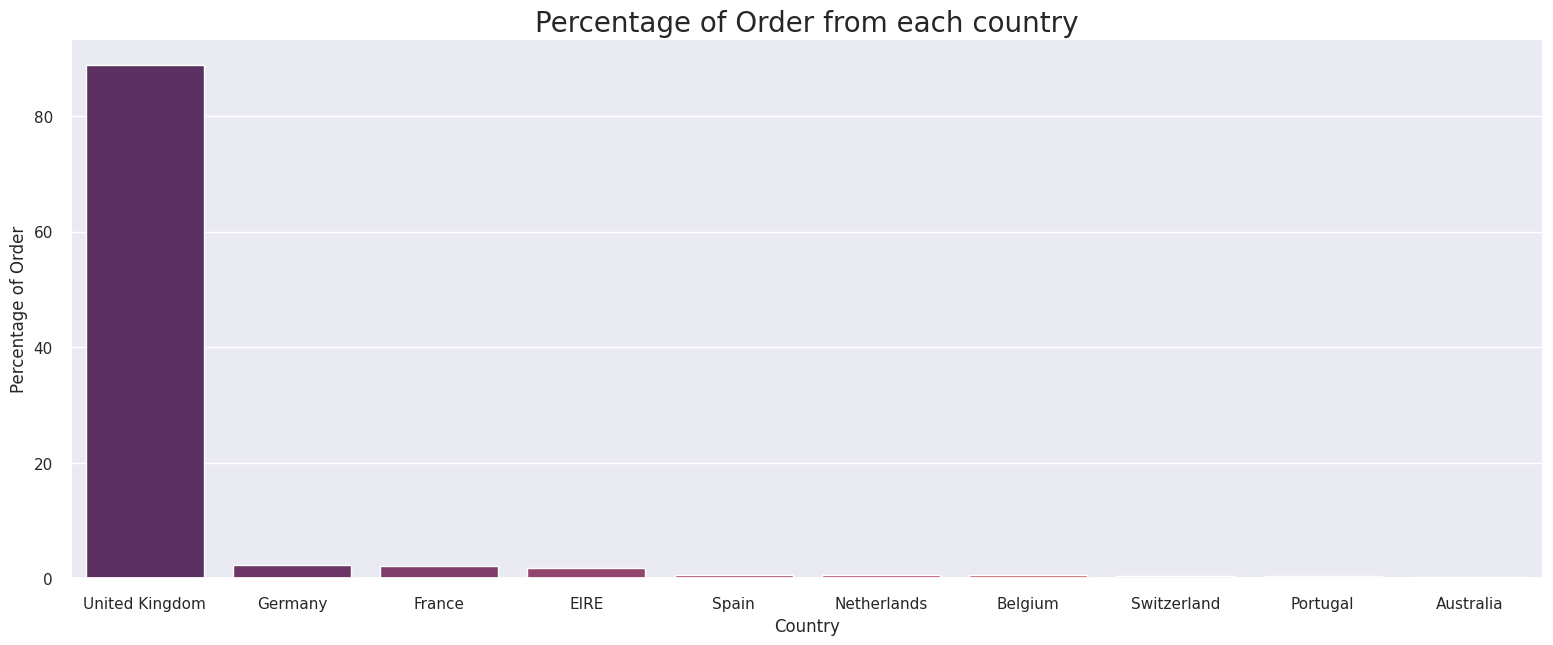

In [46]:
#Plotting barplot
bargraph(Top_ten_country,'Country','Percentage of Order','Percentage of Order from each country')

The majority of customers and orders originate from the United Kingdom, accounting for approximately 88.8% of the total

**Which country has the lowest number of orders**

In [47]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [48]:
## From country_count variable finding bottom 10 countries
Bottom_ten_country = country_count.sort_values('InvoiceNo', ascending=True, ignore_index=True).head(10)
Bottom_ten_country = Bottom_ten_country.rename({'InvoiceNo':'Num of orders'},axis=1)
Bottom_ten_country

,Country,Num of orders
0,Saudi Arabia,9
1,Bahrain,17
2,Czech Republic,25
3,Brazil,32
4,Lithuania,35
5,Lebanon,45
6,RSA,58
7,European Community,60
8,United Arab Emirates,68
9,Malta,112


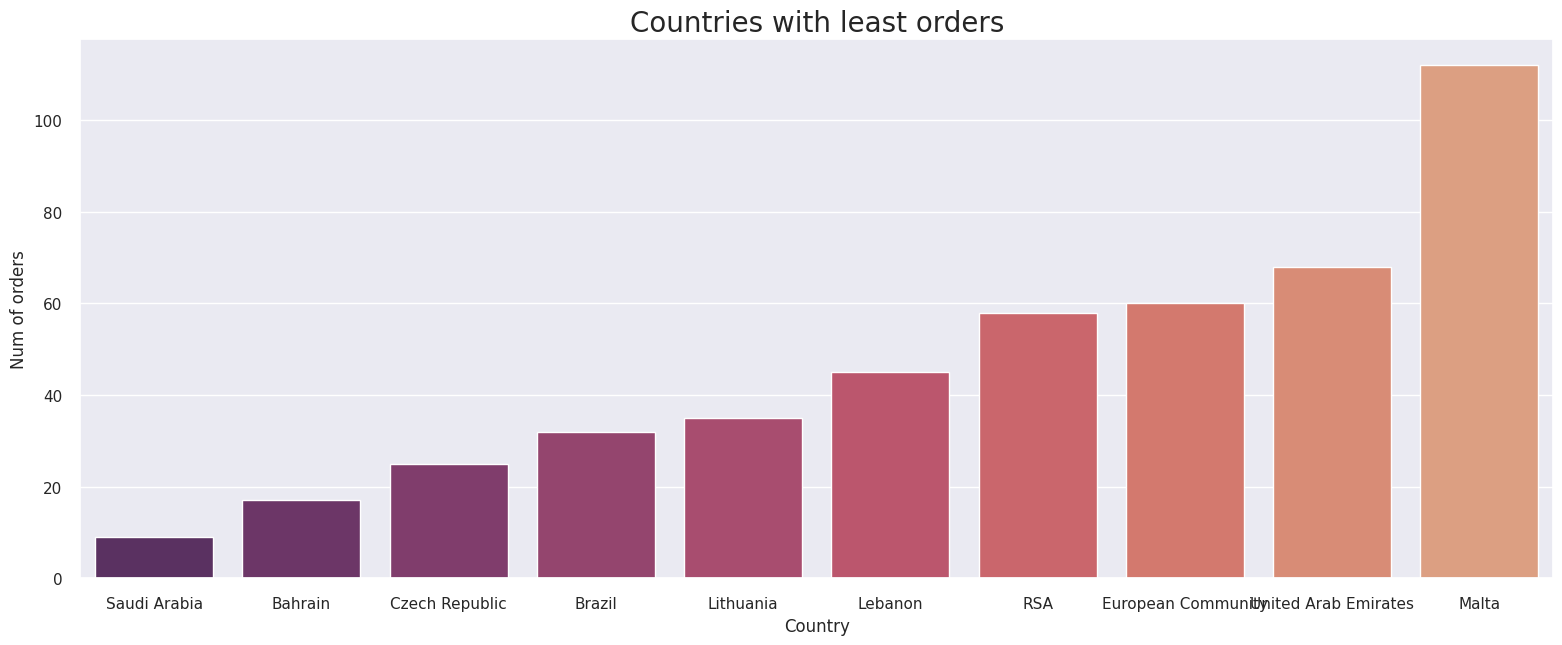

In [49]:
bargraph(Bottom_ten_country,'Country','Num of orders','Countries with least orders')

Saudi Arabia has the fewest orders among all the countries.

**CustomerID and TotalAmount**

**Who made the highest expenditure on their purchase**

In [50]:
#grouo custID based on the totalamount they spent
CustAmount = df.groupby(["CustomerID"]).TotalAmount.sum().sort_values(ascending = False).iloc[:20].reset_index()
CustAmount.head(10)

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


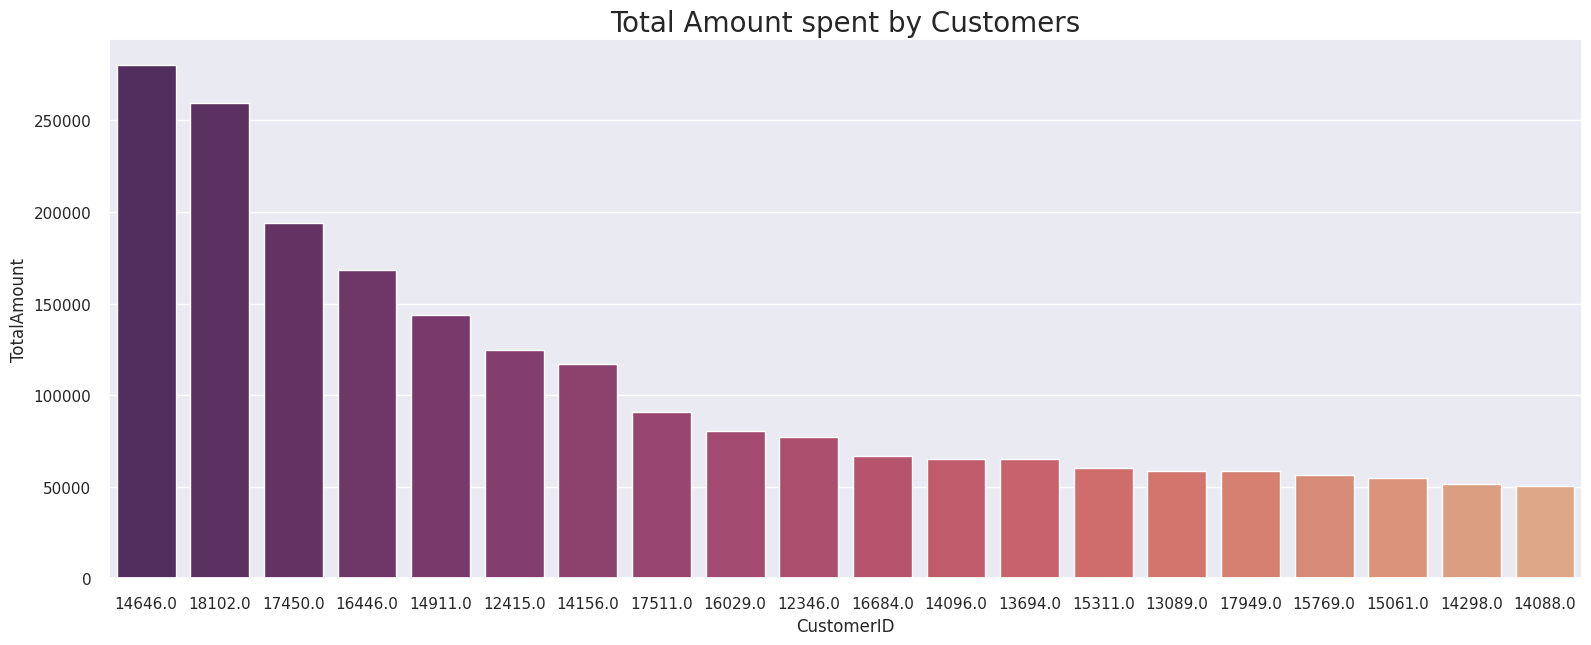

In [51]:
bargraph(CustAmount,'CustomerID','TotalAmount','Total Amount spent by Customers')

The customer with customerID 14646 outlays a greater amount of money on their purchases

**CustomerID and InvoiceNumber**

**Which Customer displays a significant degree of shopping engagement**

In [52]:
#group custID with number of invoice generated for them . This gives us the total number of order they made
Most_shopped = df.groupby(["CustomerID"]).InvoiceNo.count().sort_values(ascending = False).iloc[:20].reset_index()
Most_shopped.head(10)

,CustomerID,InvoiceNo
0,17841.0,7523
1,14911.0,5667
2,14096.0,5111
3,12748.0,4243
4,14606.0,2654
5,15311.0,2353
6,14646.0,2080
7,13089.0,1810
8,13263.0,1657
9,14298.0,1637


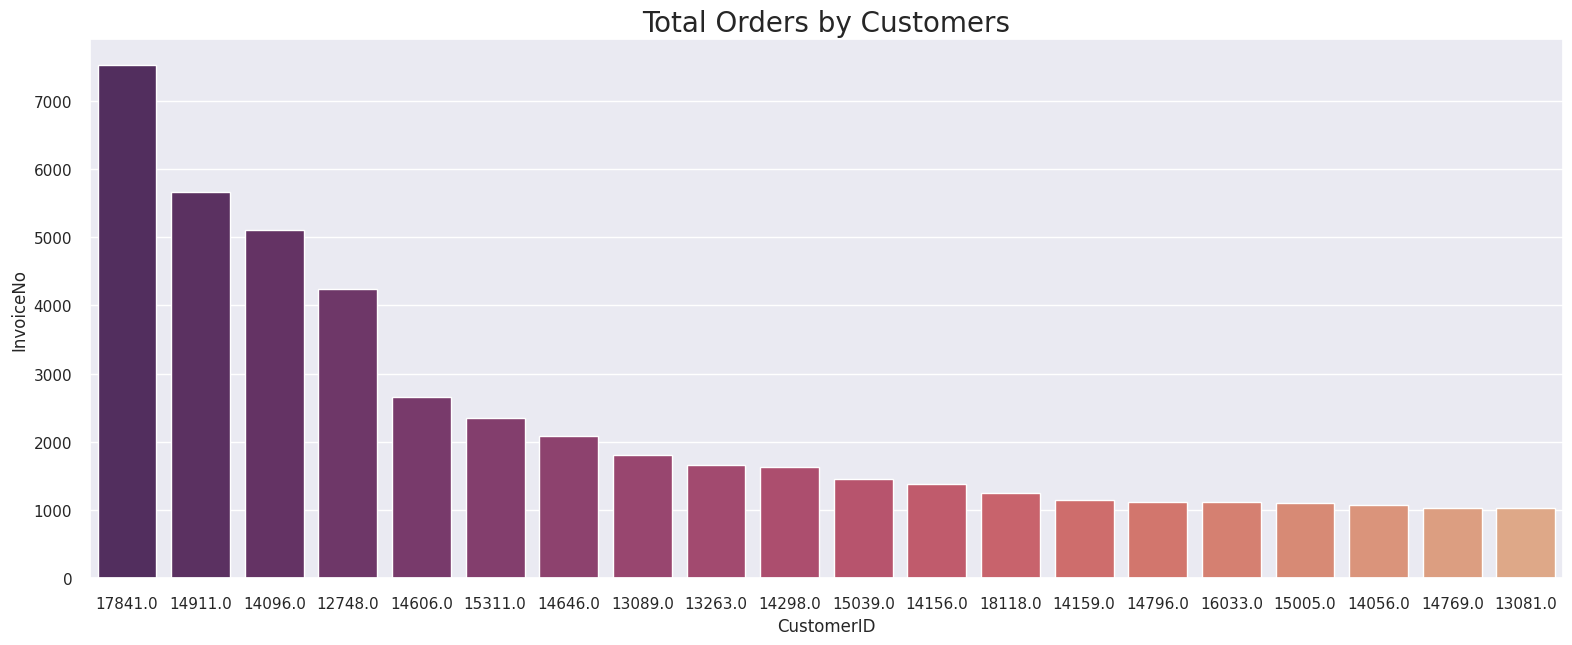

In [53]:
bargraph(Most_shopped,'CustomerID','InvoiceNo','Total Orders by Customers')

Customer ID 17841 exhibits a high level of shopping activity, frequently making orders.

**On which day is shopping most frequent or busies**

In [54]:
#Creating day_df to store number of order on each day_name
day_df=df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,78514
1,Wednesday,67258
2,Tuesday,65072
3,Monday,63608
4,Sunday,59800
5,Friday,53671


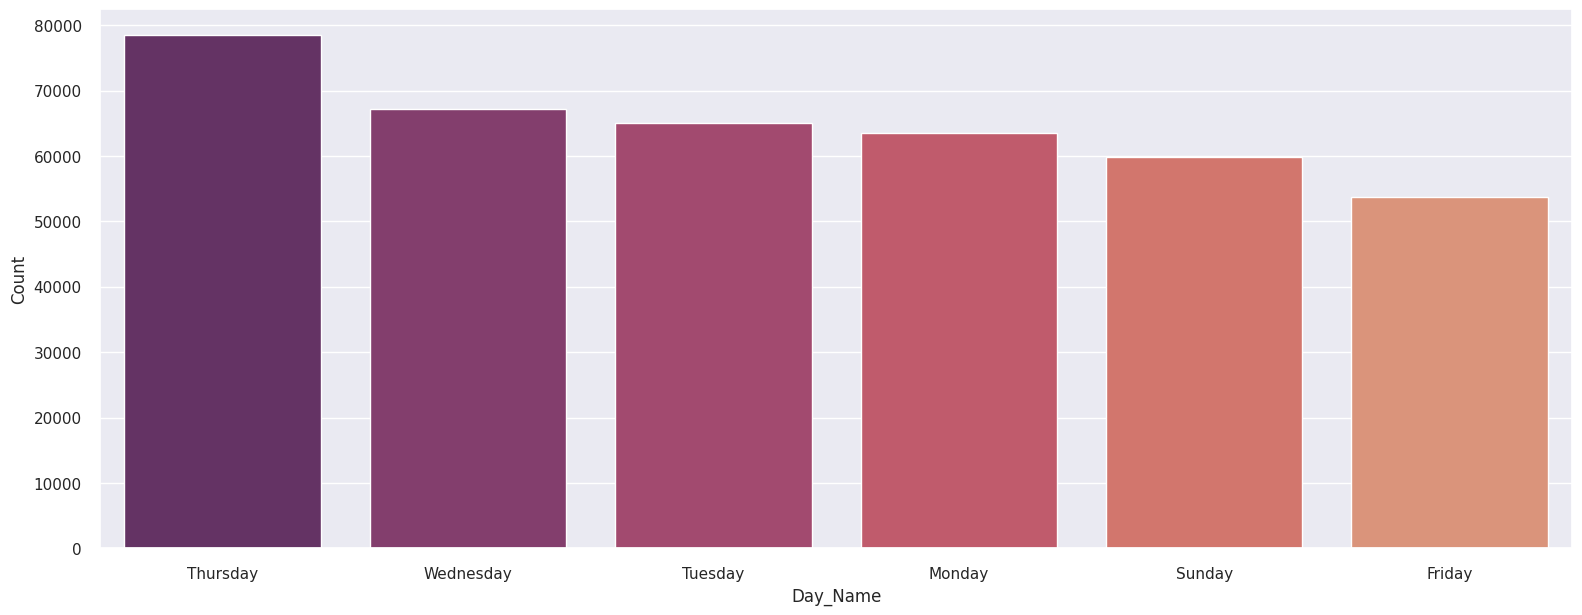

In [55]:
#plot bar plot
bargraph(day_df,'Day_Name','Count','')


Shopping activity tends to be higher on weekdays in contrast to the weekends.

**During which month is shopping at its peak**

In [56]:
#creating month_df to store number of orders in each month
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,61914
1,October,48099
2,December,41999
3,September,39335
4,May,27840
5,June,26710
6,March,26592
7,August,26586
8,July,26344
9,April,22240


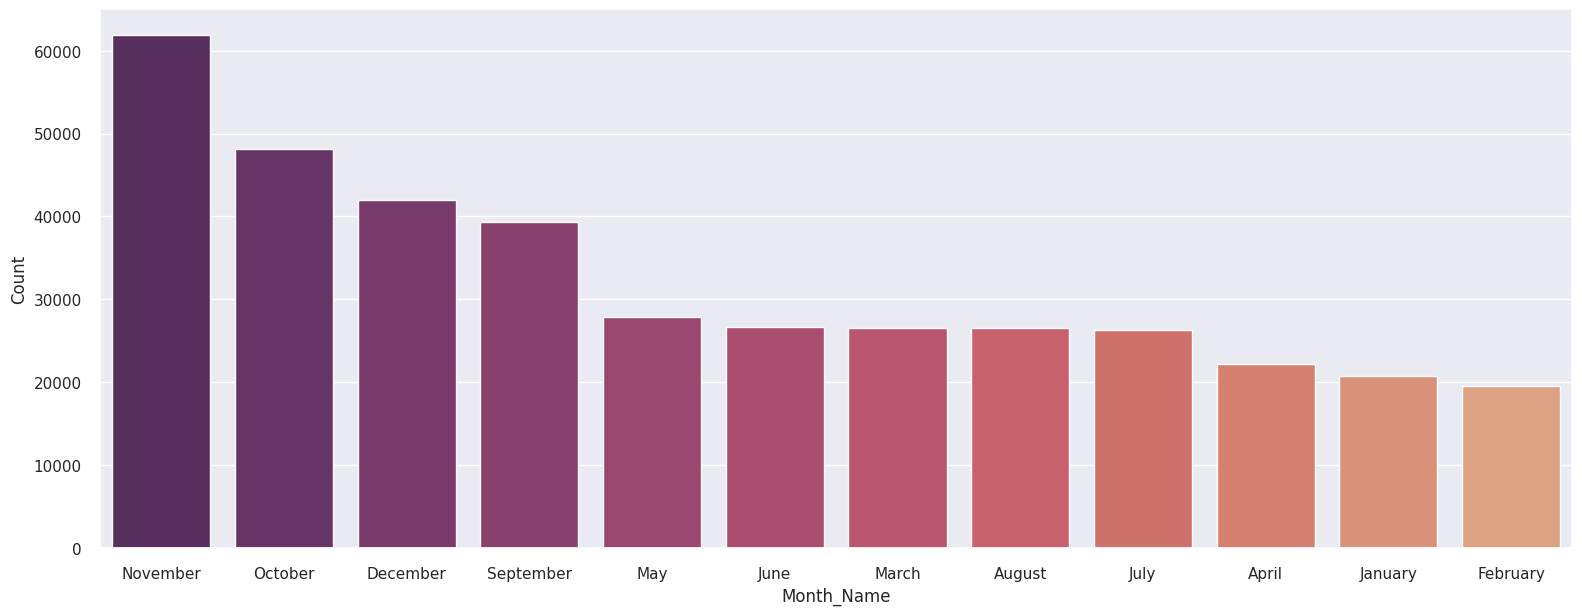

In [57]:
#plotting bar plot
bargraph(month_df,'Month_Name','Count','')


Shopping tends to peak during the latter part of the year, particularly in September, October, November, and December. This surge in shopping activity can be attributed to the multitude of festivals and celebrations that occur during this period.

**What are the peak hours for purchases**

In [58]:
#creating hour_df to store number of orders every hour
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,69889
1,13,62081
2,14,52465
3,11,47718
4,15,44253
5,10,37569
6,16,23381
7,9,21912
8,17,12814
9,8,8685


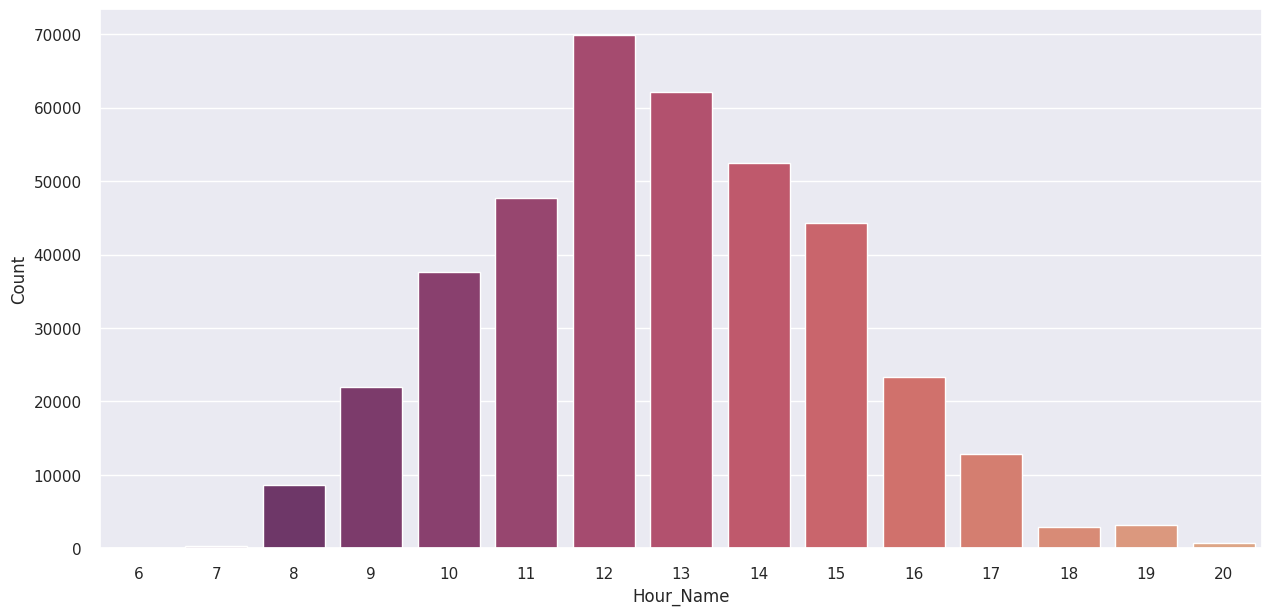

In [59]:
plt.figure(figsize=(15,7))
sns.barplot(x='Hour_Name',y='Count',data=hour_df,palette='flare_r')
plt.show()

In [60]:
##Splitting into 3 groups such as morning, afternoon and evening based on timings.
df['Time_type']=df['hour'].apply(time_type)

<function matplotlib.pyplot.show(close=None, block=None)>

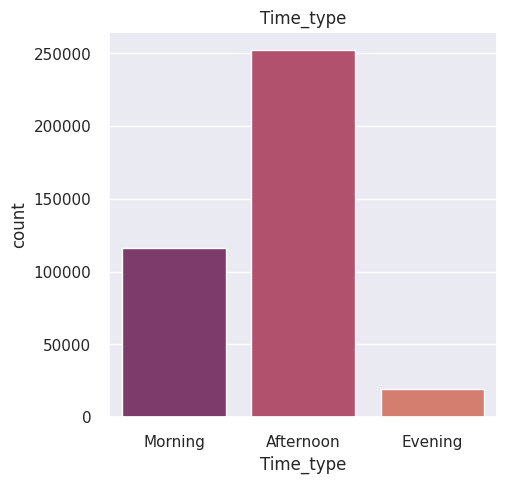

In [61]:
plt.figure(figsize=(5,5))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df,palette='flare_r')
plt.show

We can notice that the majority of purchases occur in the afternoon.

**Which are the top selling products**

In [62]:
#Creating Description_df to store number of orders for every product
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2005
1,REGENCY CAKESTAND 3 TIER,1704
2,JUMBO BAG RED RETROSPOT,1612
3,PARTY BUNTING,1383
4,ASSORTED COLOUR BIRD ORNAMENT,1382


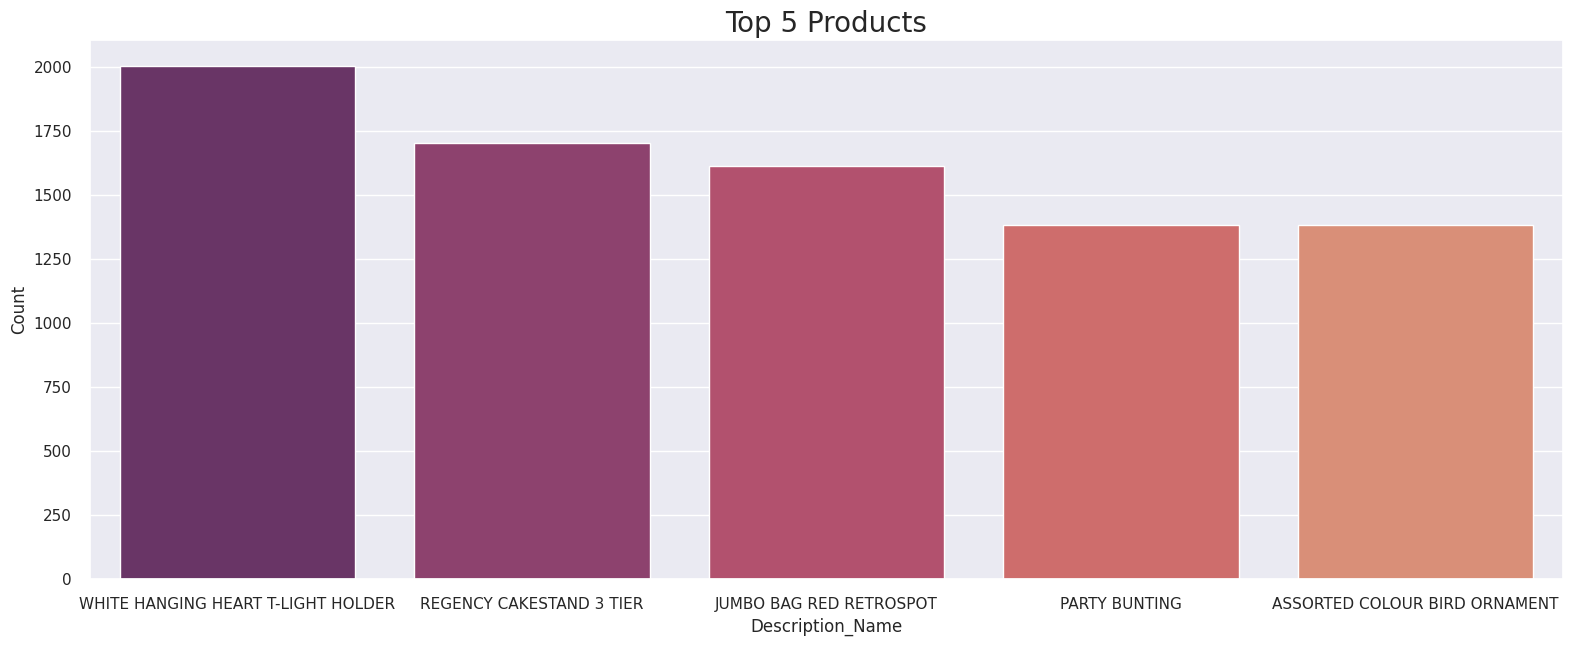

In [63]:
#plotting bar plot
bargraph(Description_df[:5],"Description_Name","Count","Top 5 Products")

The top 5 selling products are as follows -

1.   White Hanging Heart T-Light Holder
2.   Regency Cakestand 3 tier

1.   Jumbo Bag Red Retrospot
2.   Party Bunting

1.   Assorted colour bird ornament


**Model Building**

**RFM model:**

The RFM model is a marketing and customer segmentation framework that is commonly used in business to analyze and categorize customers based on their past behavior. RFM stands for Recency, Frequency, and Monetary Value, and it is used to group customers into different segments to better understand their value and tailor marketing strategies accordingly. Here's what each component of the RFM model represents:

1.Recency (R): This measures how recently a customer has made a purchase or interacted with the company. Customers who have engaged with the business more recently are often considered more valuable.

2.Frequency (F): This measures how often a customer makes purchases or interacts with the company. Customers who buy frequently or engage with the business on a regular basis are typically more valuable.

3.Monetary Value (M): This measures the total amount of money a customer has spent on purchases. High-spending customers are typically considered more valuable.

Based on these three factors, customers are segmented into different groups. For example, you might have segments like:

High-Value Customers: Those who score high in recency, frequency, and monetary value.
At-Risk Customers: Those who have made purchases in the past but haven't done so recently.
Low-Value Customers: Those who have made small purchases or infrequent purchases.
Once customers are segmented, businesses can tailor their marketing strategies, promotions, and communication to each group, aiming to retain high-value customers, re-engage at-risk customers, and possibly re-activate low-value customers.

The RFM model is a valuable tool in customer relationship management, helping businesses understand and maximize the value of their customer base.

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M)

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning


We establish a benchmark date to identify the latest transactions. This benchmark date is set as one day after the date of the most recent transaction in the dataset. Subsequently, we compute the number of days that have elapsed between the customer's most recent transaction and this benchmark date.

In [65]:
Latest_Date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
Latest_Date = Latest_Date + dt.timedelta(days=1)

Latest_Date

Timestamp('2011-12-10 12:50:00')

Recency = Latest Date - Last Invoice Data
<br>
Frequency = count of invoice no. of transaction(s)
<br>
Monetary = Sum of Total Amount spent by each customer

In [66]:
#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)


#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


**Checking for Skewness**

Recency's: Skew: 1.2459259732239887, : SkewtestResult(statistic=26.614420985448668, pvalue=4.6224317516580606e-156)
Frequency's: Skew: 17.988762095343063, : SkewtestResult(statistic=83.43430129337605, pvalue=0.0)
Monetary's: Skew: 19.347358463913086, : SkewtestResult(statistic=85.03831989385715, pvalue=0.0)


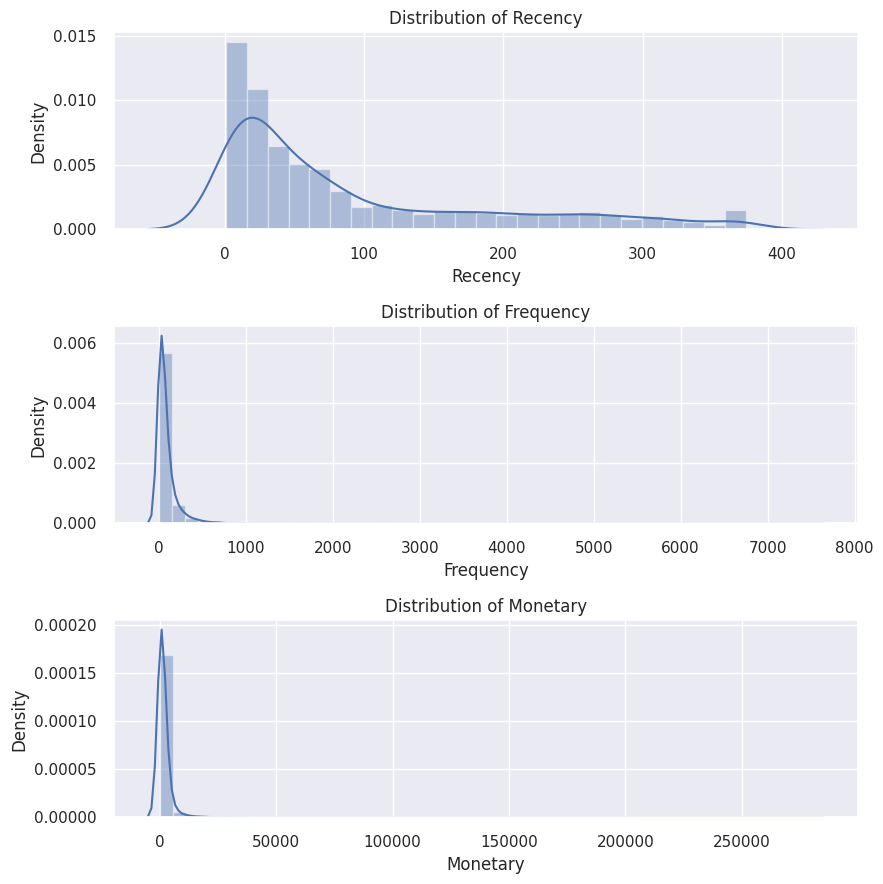

In [67]:
# Plot to check skewness
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm_df,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm_df,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm_df,'Monetary')

plt.tight_layout()

**Removing Skewness**

In [68]:
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Recency's: Skew: -0.5539163020068809, : SkewtestResult(statistic=-13.968391843280067, pvalue=2.4305297860916617e-44)
Frequency's: Skew: -0.21822522642703573, : SkewtestResult(statistic=-5.811072263917291, pvalue=6.207395941499347e-09)
Monetary's: Skew: 0.35367147660374587, : SkewtestResult(statistic=9.253271323912841, pvalue=2.1772486762265053e-20)


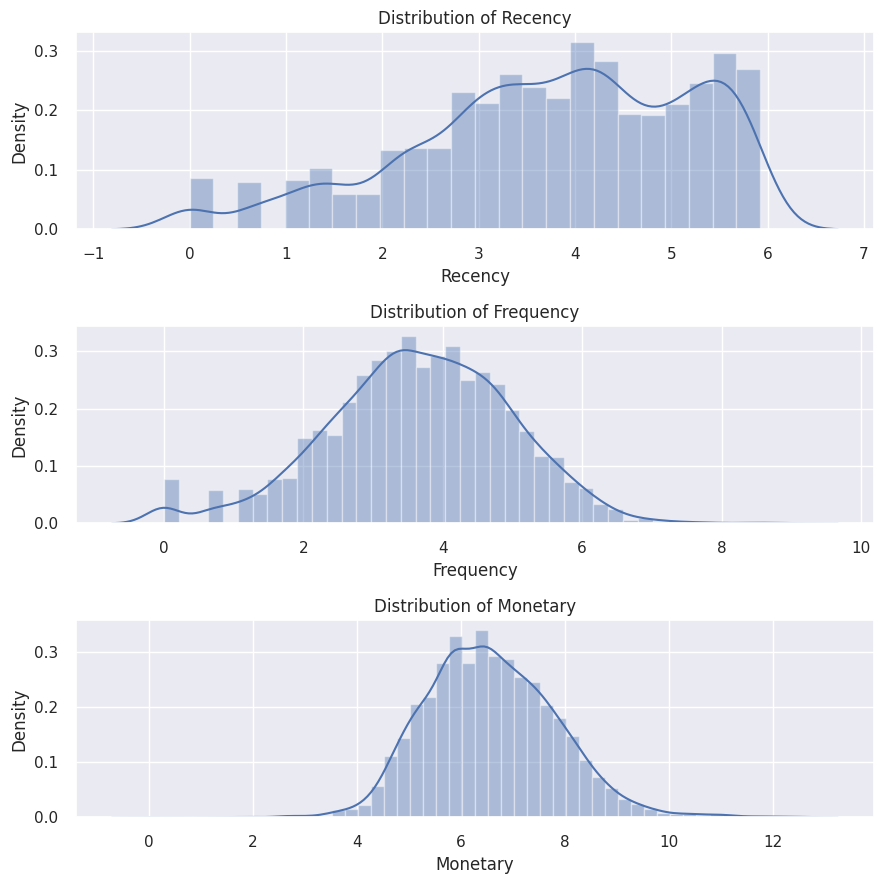

In [69]:
# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(Log_Tfd_Data,'Recency')

plt.subplot(3, 1, 2)
check_skew(Log_Tfd_Data,'Frequency')

plt.subplot(3, 1, 3)
check_skew(Log_Tfd_Data,'Monetary')

plt.tight_layout()


We've finished the initial phase, which involved constructing an RFM model. It's now the stage where we need to categorize customers into segmented groups

In [70]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 97.0},
 'Monetary': {0.25: 305.19, 0.5: 664.0, 0.75: 1650.265}}

Now, lets divide the customer into tiered groups.

Customers with an RFM score of 111 - Top-tier or High-potential customers.

Customers with an RFM score of 444 - Lowest-tier or Poor-performing customers.

In [71]:
#Calculate and Adding R, F and M segment value columns in the existing dataset.
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,19,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


Identifying Customer Segments:

**1.Elite Customers:** This category comprises customers falling into the R-Tier-1, F-Tier-1, and M-Tier-1, denoted as 1-1-1. These individuals have made recent, frequent, and high-value transactions, making them the most valuable segment.

**2.Big-Spending Newcomers:** These customers are represented by the segments 1-4-1 and 1-4-2. Although they have only transacted once, it was a substantial recent transaction, distinguishing them as high spenders among new customers.

**3.Dedicated, Low-Spending Loyal Customers:** This group includes customers falling into segments 1-1-3 and 1-1-4. They exhibit frequent transaction activity, albeit with relatively modest spending levels.

For effective marketing strategies, it's important to target specific customer groups based on business goals and retention objectives.

RFM marketing, by examining the behavior of specific customer segments, enables marketers to engage with their audience more effectively.

**1.Top-tier Customers:**  Communication with this category should aim to convey appreciation and recognition. These customers typically contribute a significant portion of the overall revenue, making their satisfaction a top priority. In-depth analysis of their preferences and affinities presents opportunities for even more tailored messaging.

**2.High-value New Customers:** It's crucial to nurture all new customers, but especially those who have made substantial initial purchases. Like the best customers, these individuals should feel valued and be offered compelling incentives to maintain their engagement with the brand.

**3.Loyal Customers with Modest Spending:** These loyal customers, despite their low spending, remain actively engaged. Marketers should design campaigns that not only make them feel valued but also encourage them to increase their spending. Given their loyalty, it can also be beneficial to reward them with special offers when they refer the brand to friends, perhaps through social networks.

In [72]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,19,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [73]:
rfm_df.RFMScore.describe()

count    4339.000000
mean        7.495736
std         2.815057
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

Customers with lower RFM scores (beginning from 3) are considered the most valuable, while those with higher RFM scores are categorized as less valuable or not as beneficial to the business. Depending on our business objectives, we can establish a specific threshold to identify and focus on our target customers.

Now lets apply log function to remove skewness.

In [74]:
rfm_df_scaled = pd.DataFrame()

In [75]:
rfm_df_scaled["Recency"] = np.log(rfm_df.Recency)
rfm_df_scaled["Frequency"] = np.log(rfm_df.Frequency)
rfm_df_scaled["Monetary"] = np.log(rfm_df.Monetary)

In [76]:
rfm_df_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.944439,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338


**Hierarchical Clustering**


Hierarchical clustering is a method used in data analysis and machine learning to group similar data points into clusters or hierarchies based on their similarity or dissimilarity. This technique creates a tree-like structure or dendrogram, which shows the relationships between data points at different levels of granularity. Hierarchical clustering can be used for various purposes, such as identifying patterns in data, segmenting customers, or organizing objects into a hierarchy based on their similarities. It is a versatile and powerful technique that can be applied in different domains, from biology to marketing and beyond.

In [77]:
#creating acopy of dataframe to apply hierarchical model
Hierarchical_model = rfm_df_scaled.copy()

There are different types of linkage. Lets observe few of them.

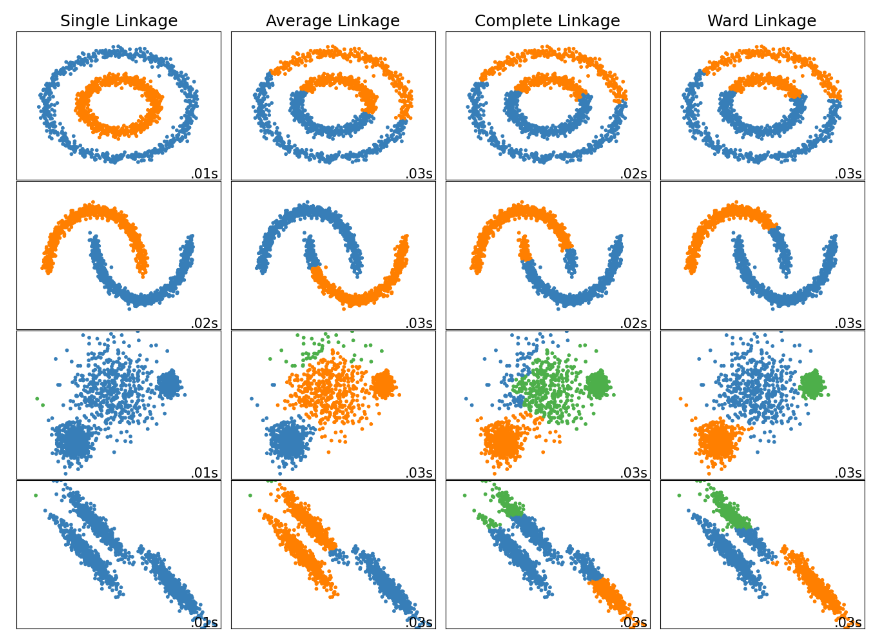

Based on the above chart, Type-3 data appears to perform more effectively with both complete and Ward linkages, with a preference for Ward linkages. To further explore this, we will apply both complete and Ward linkages and analyze the resulting dendrogram.

**Complete Linkage**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.
<br>

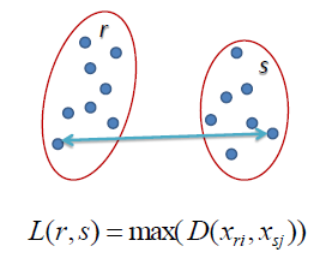

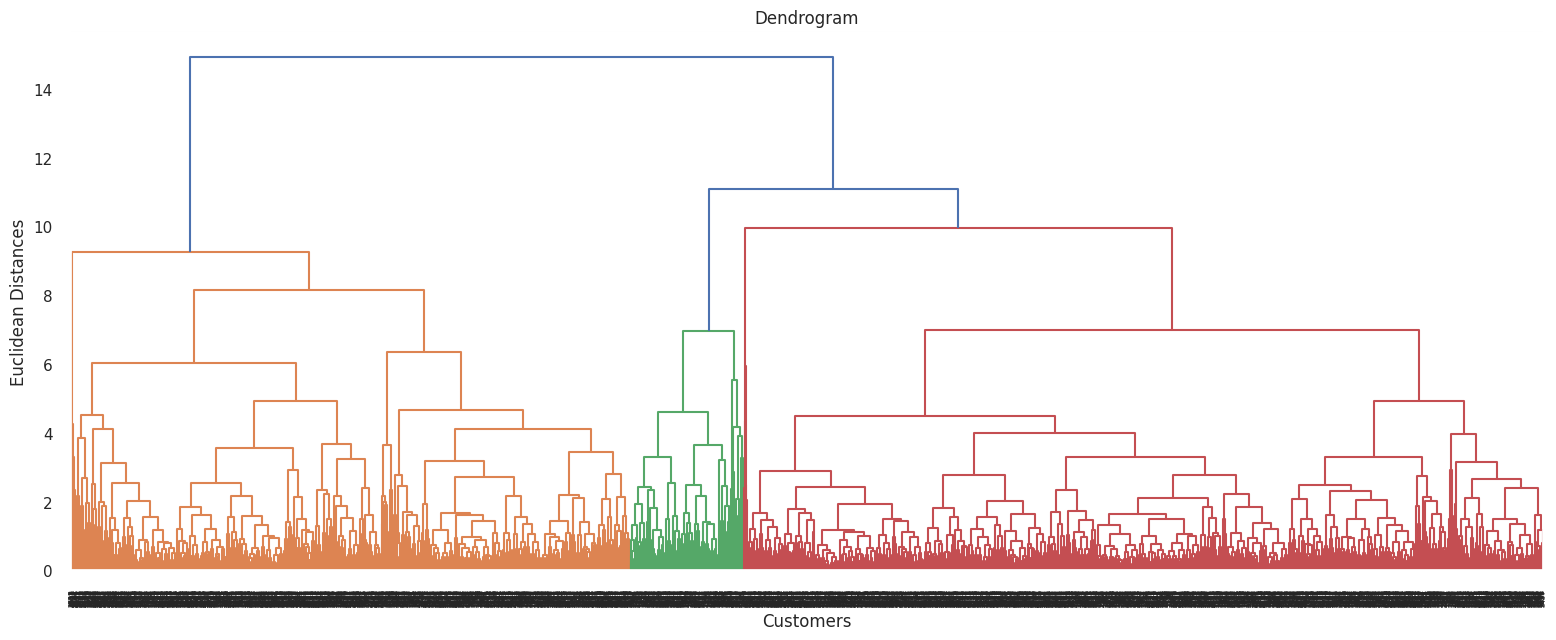

In [78]:
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(Hierarchical_model, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

**Ward Linkage**

Ward's procedure is a variance method which attempts to generate clusters to minimise the within-cluster variance. For each cluster, the means for all the variables are computed. Next, for each object, the squared Euclidean distance to the cluster means is calculated. These distances are summed for all the objects.
<br>

Mathematically this can be written as,
<br>
sim(C1,C2)=∑(dist(Pi,Pj))²/(|C1|∗|C2|)

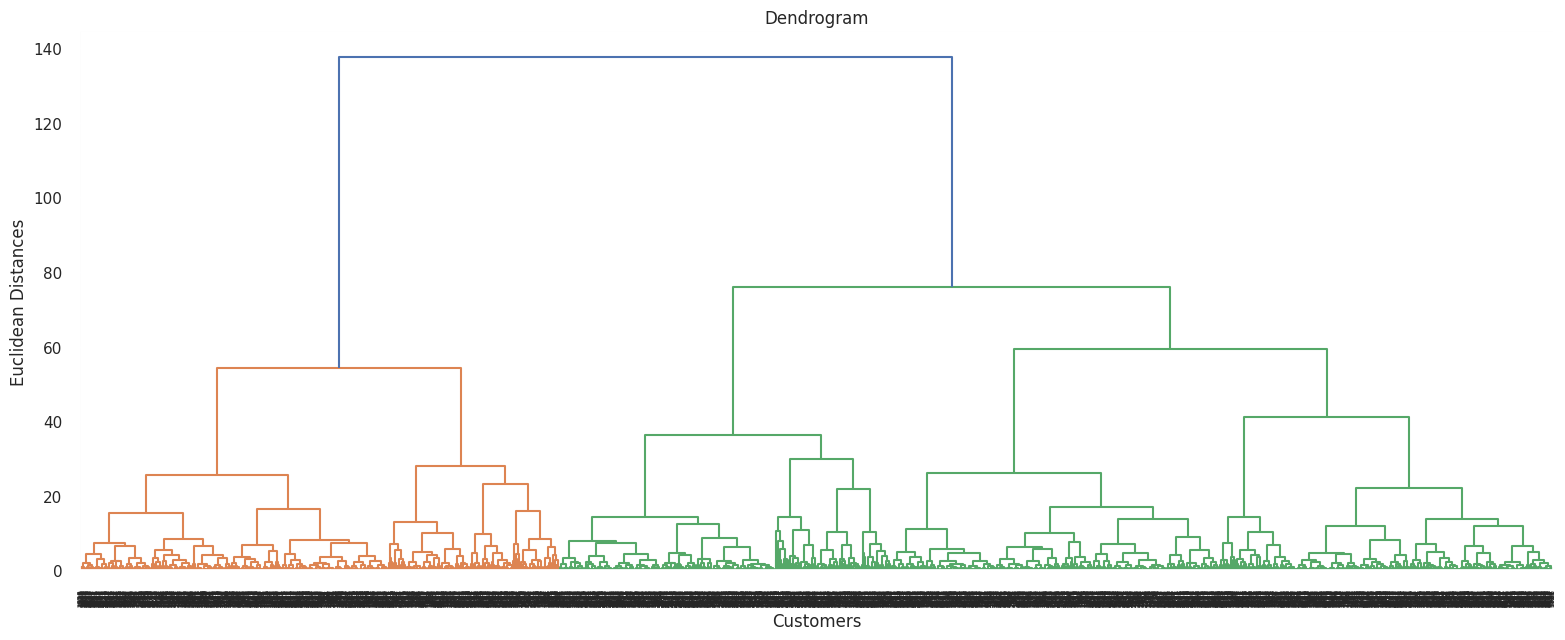

In [79]:
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(Hierarchical_model, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

Now we need to find the largest vertical distance we can make without crossing any other horizontal line.


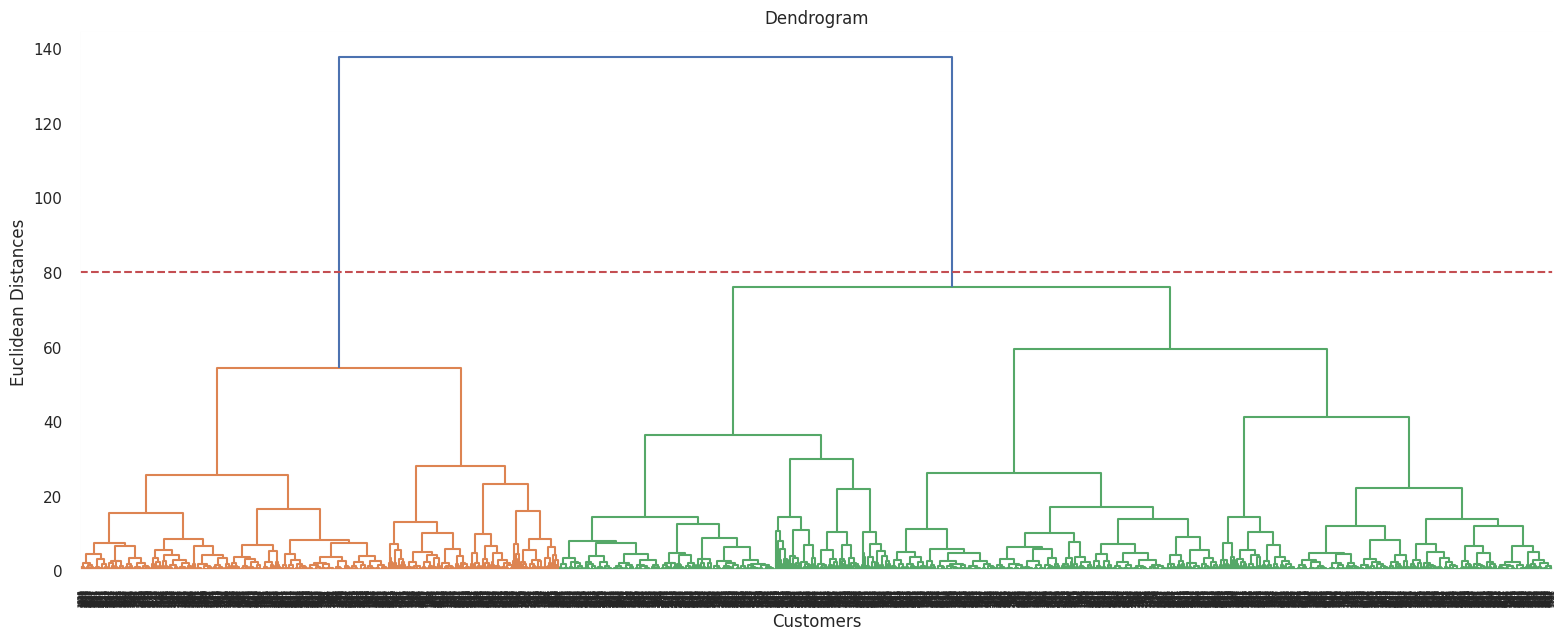

In [80]:
dendrogram = sch.dendrogram(sch.linkage(Hierarchical_model, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

Now lets apply Agglomerative Clustering with 'ward' linkage.

In [81]:
# Fitting hierarchical clustering to the mall dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
Hierarchical_model["cluster"] = hc.fit_predict(Hierarchical_model)

In [82]:
Hierarchical_model.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,5.786897,0.000000,11.253942,0
12347.0,0.693147,5.204007,8.368693,1
12348.0,4.317488,3.433987,7.494007,0
12349.0,2.944439,4.290459,7.471676,1
12350.0,5.736572,2.833213,5.812338,0


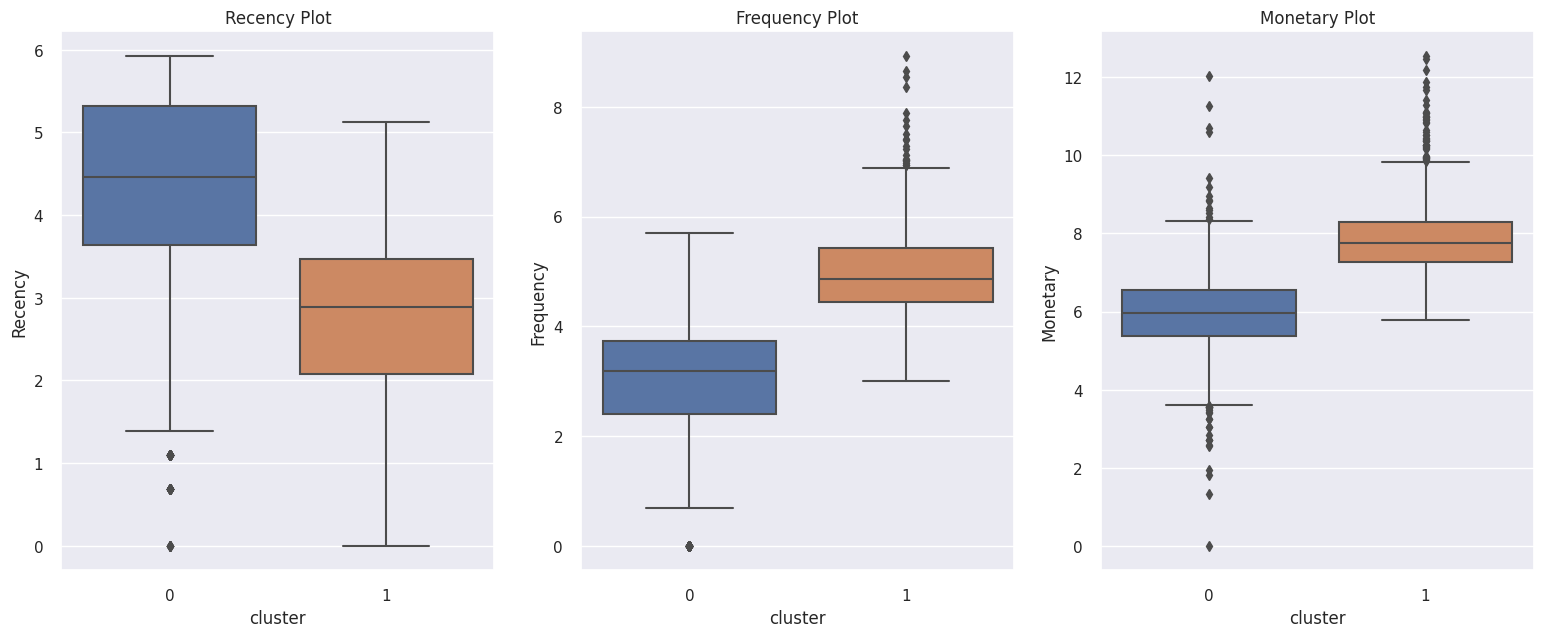

In [83]:
# plot
plt.figure(figsize=(19,7))
plt.subplot(1, 3, 1)
plt.title("Recency Plot")
sns.boxplot(x='cluster', y='Recency', data=Hierarchical_model)
plt.subplot(1, 3, 2)
plt.title("Frequency Plot")
sns.boxplot(x='cluster', y='Frequency', data=Hierarchical_model)
plt.subplot(1,3,3)
plt.title("Monetary Plot")
sns.boxplot(x='cluster', y='Monetary', data=Hierarchical_model)
plt.show()

Based on 'Wards linkage' we have created 2 clusters.

Cluster 0 consists of customers who made their purchases some time ago, do not shop very often, and typically spend relatively less money.

Cluster 1 comprises customers who have recently made purchases, shop frequently, and tend to spend a significant amount of money

**Kmeans Clustering**


K-means clustering is a machine learning technique that groups data points into clusters based on their similarity. It works by iteratively partitioning data points into K clusters, where K is a user-defined paramete

In [84]:
#creating a copy of dataframe to apply kmeans model
Kmeans_model = rfm_df_scaled.copy()

The main disadvantage of Kmeans clustering is we need to define 'K' in the begining.
<br>
So, to decide 'K' in kmeans clustering we have few methods -


*   Silhouette score
*   Elbow method
<br>

Lets apply both of them and identify the optimal number of clusters.



In [85]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Kmeans_model)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(Kmeans_model, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.39466492830615596
For n_clusters=3, the silhouette score is 0.30258639285129135
For n_clusters=4, the silhouette score is 0.3063363562646587
For n_clusters=5, the silhouette score is 0.28108332944150755
For n_clusters=6, the silhouette score is 0.2831540191265918
For n_clusters=7, the silhouette score is 0.27275746719159505
For n_clusters=8, the silhouette score is 0.26691041139271665


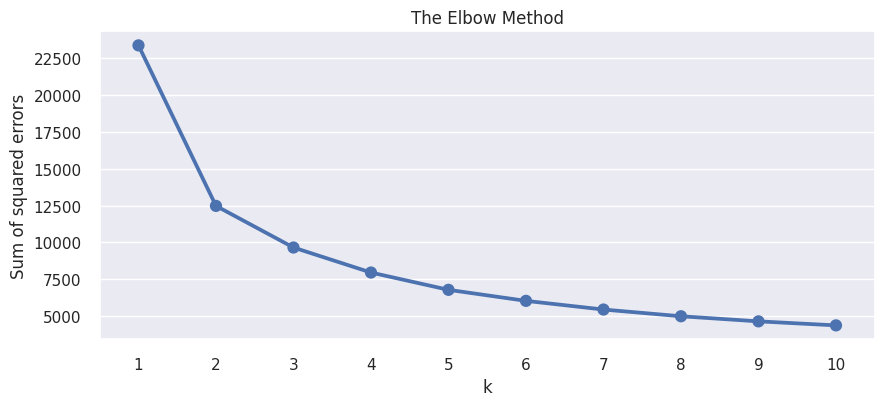

In [86]:
### Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = Kmeans_model[["Recency", "Frequency", "Monetary"]]

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Plotting the elbow plot
plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k');
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Based on both the Silhouette score and the Elbow method, it is recommended to use a K-means model with 3 clusters

In [87]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
kmeans.fit(data_norm)
Kmeans_model["cluster"] = kmeans.predict(data_norm)

In [88]:
Kmeans_model.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,5.786897,0.000000,11.253942,1
12347.0,0.693147,5.204007,8.368693,2
12348.0,4.317488,3.433987,7.494007,1
12349.0,2.944439,4.290459,7.471676,1
12350.0,5.736572,2.833213,5.812338,0


Checking Mean RFM values in different clusters to understand cluster properties

In [89]:
Kmeans_model.groupby(["cluster"])[['Recency','Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
cluster,,,
0,4.872435,2.389950,5.435638
1,3.815818,3.962120,6.761971
2,1.948716,5.082502,8.018419


We have grouped our data into 3 clusters - 0,1 and 2.
<br>

The customer who comes under **Cluster 0** are not so recent, not so frequent and won't spend more money. So, this group of customers are not so usefull for us.
<br>

The customer who comes under **Cluster 1** are some what more recent,frequent and spend some what more money compared to Cluster 0.
<br>

The customer who comes under **Cluster 2** are Best/Potential customers (we cannot loose them) because they are very recent, more frequent and spend more money aswell.


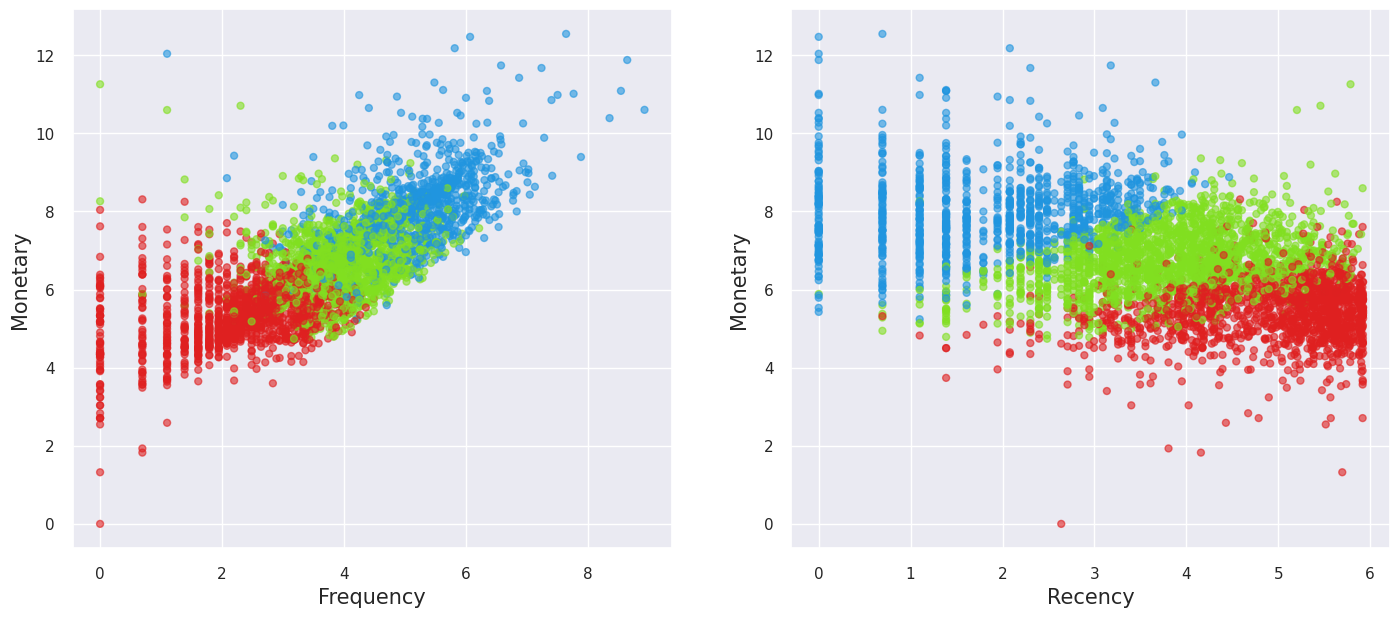

In [90]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to dataframe
Kmeans_model['cen_x'] = Kmeans_model.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Kmeans_model['cen_y'] = Kmeans_model.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Kmeans_model['c'] = Kmeans_model.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
plt.scatter(Kmeans_model.Frequency, Kmeans_model.Monetary, c=Kmeans_model.c, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.subplot(1,2,2)
plt.scatter(Kmeans_model.Recency, Kmeans_model.Monetary, c=Kmeans_model.c, alpha = 0.6, s=25)
plt.xlabel('Recency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.show()

Here Red color represents Cluster 0, Green color represents Cluster 1 and Blue color represents Cluster 2.
<br>

In Monetary vs Frequency plot we can observe that Blue grouped customers (i.e., Cluster 2) are more frequent and spend more money.
<br>

In Monetary vs Recency plot we can observe that Blue grouped customers (i.e., Cluster 2) are more recent i.e, they shopped recently and spend more money.

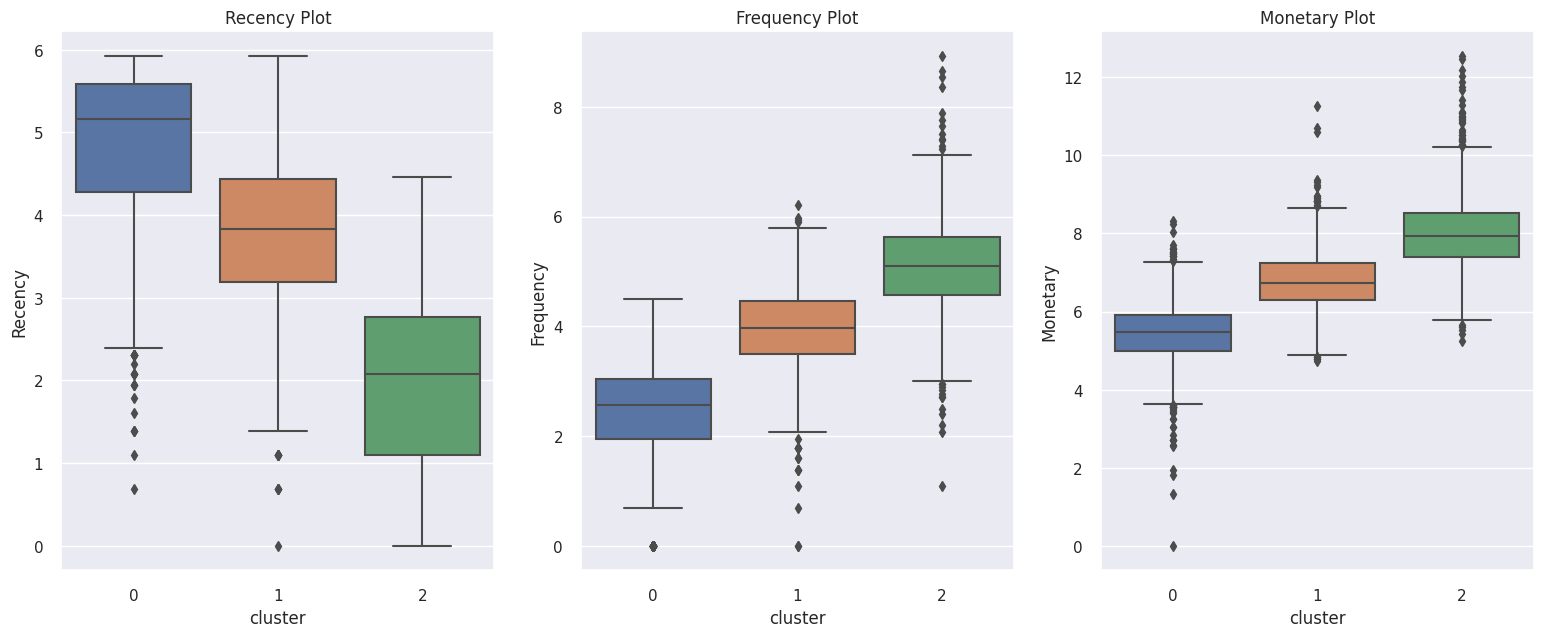

In [91]:
# plot
plt.figure(figsize=(19,7))
plt.subplot(1, 3, 1)
plt.title("Recency Plot")
sns.boxplot(x='cluster', y='Recency', data=Kmeans_model)
plt.subplot(1, 3, 2)
plt.title("Frequency Plot")
sns.boxplot(x='cluster', y='Frequency', data=Kmeans_model)
plt.subplot(1,3,3)
plt.title("Monetary Plot")
sns.boxplot(x='cluster', y='Monetary', data=Kmeans_model)
plt.show()

Even this box plot also signifies the same.
<br>

Cluster 0 has less recent (shopped few/many days ago), less frequent and less monetary (spends lesss money) customers
<br>

Cluster 1 has comparitively high recent, high frequent and more monetary than Cluster 0.
<br>

Cluster 2 is more recent, more frequent and high monetary.

**Conclusion**

In our initial dataset exploration, we identified key trends:

1.Approximately 88.8% of orders originate from the United Kingdom, suggesting the majority of our customer base and orders are UK-based.

2.Saudi Arabia stands out as having the lowest order count. This warrants consideration of strategies to boost customer engagement in this region.

3.Weekdays see higher shopping activity than weekends, indicating a preference for weekday shopping.

4.Shopping activity tends to peak towards the year's end, specifically in September, October, November, and December. This aligns with heightened shopping during festive seasons.

5.Afternoon hours are the most popular time for making purchases.




In model building, we kick off with RFM segmentation, a marketing method that ranks and groups customers based on recency, frequency, and monetary value. This helps us identify and target the most valuable customers, such as those with an RFM score of 111, while also categorizing less valuable ones like those with a score of 444. We also define specific customer segments like "Best Customers," "High-spending New Customers," and "Low-Spending Active Loyal Customers." Marketers should create tailored customer groups that align with their business goals and retention objectives

We employed a couple of unsupervised machine learning techniques:

**1.Hierarchical Clustering:** By visualizing a dendrogram, we discerned the data's inherent structure, ultimately partitioning it into two distinct clusters.

**2.K-means Clustering:** Utilizing both silhouette score and the elbow method, we determined that the optimal division of the data consisted of 3 well-defined clusters

Segmentation using K-means clustering has yielded three distinct customer groups:

**1.Low-Value Customers (Cluster 0):** These customers are less frequent shoppers who spend relatively little money and made purchases a while ago.

**2.Average-Value Customers (Cluster 1):** This group comprises somewhat more recent and frequent customers who spend moderately. They are at a higher risk of attrition, so we should engage them with enticing offers to prevent losing them.

**3.High-Value Customers (Cluster 2):** This segment includes very recent, frequent, and high-spending customers. They are our most valuable clientele, generating a significant portion of our revenue. It's crucial to maintain their satisfaction by personalized communication and offers.

These individuals represent our most valuable and promising clientele, and it is imperative that we maintain a strong connection with them. Nurturing our relationship with this segment is crucial as they are likely responsible for a significant portion of our total revenue. Therefore, our primary objective should be ensuring their satisfaction and demonstrating our appreciation. By delving deeper into their unique preferences and interests, we can uncover additional avenues for tailoring our communications to create even more personalized and engaging interactions.

**Lets visualize these segments in 3D plot.**

In [92]:
fig = px.scatter_3d(Kmeans_model, x='Recency', y='Frequency', z='Monetary',
              color='cluster')
fig.show()